# 📊 Analysis of Netflix platform

## Import Libraries

In [3]:
import pandas as pd

## Load dataset

In [4]:
df=pd.read_csv(r"E:\Project OTT\netflix_titles.csv")

## Inspect Data

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7982 non-null   object 
 5   country       7976 non-null   object 
 6   date_added    8796 non-null   object 
 7   release_year  8806 non-null   float64
 8   rating        8803 non-null   object 
 9   duration      8803 non-null   object 
 10  listed_in     8807 non-null   object 
 11  description   8807 non-null   object 
dtypes: float64(1), object(11)
memory usage: 825.8+ KB


We need to check the data type and Null values

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        11
release_year       1
rating             4
duration           4
listed_in          0
description        0
dtype: int64

## Remove null values

In [7]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['duration'] = df['duration'].fillna(0)
df['rating'] = df['rating'].fillna('NR')
df['country']=df['country'].fillna('Unknown')

In [8]:
df = df.dropna(subset=['date_added','release_year'])

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Check the Datatype

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['added_year'] = df['date_added'].dt.year
df['release_year'] = df['release_year'].astype(int)

First change the datatype to datetime format and separate the year. Since [date_added] column have Month, days, and year . I split year as [added_year] separetely for better analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8796 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8796 non-null   object        
 1   type          8796 non-null   object        
 2   title         8796 non-null   object        
 3   director      8796 non-null   object        
 4   cast          8796 non-null   object        
 5   country       8796 non-null   object        
 6   date_added    8796 non-null   datetime64[ns]
 7   release_year  8796 non-null   int64         
 8   rating        8796 non-null   object        
 9   duration      8796 non-null   object        
 10  listed_in     8796 non-null   object        
 11  description   8796 non-null   object        
 12  added_year    8796 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 927.7+ KB


#### Split listed in and cast column 

In [12]:
df_cast = df[['title', 'cast']].dropna().copy()

# Split cast string by comma and explode to rows
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')

# Remove 'unknown' or any empty values
df_cast['cast'] = df_cast['cast'].str.strip()
df_cast = df_cast[df_cast['cast'].str.lower() != 'unknown']
df_cast = df_cast[df_cast['cast'] != '']

# Optional: remove duplicates
df_cast.drop_duplicates(inplace=True)

In [13]:
#### Split listed in and cast column

In [14]:
df_cast = df[['title', 'cast']].dropna().copy()

# Split cast string by comma and explode to rows
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')

# Remove 'unknown' or any empty values
df_cast['cast'] = df_cast['cast'].str.strip()
df_cast = df_cast[df_cast['cast'].str.lower() != 'unknown']
df_cast = df_cast[df_cast['cast'] != '']

# remove duplicates
df_cast.drop_duplicates(inplace=True)

df_genres = df[['title', 'listed_in']].dropna().copy()

# Split genre string and explode
df_genres['genre'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('genre')

# Clean genre column
df_genres['genre'] = df_genres['genre'].str.strip()
df_genres = df_genres[df_genres['genre'].str.lower() != 'unknown']
df_genres = df_genres[df_genres['genre'] != '']

# drop duplicates
df_genres.drop_duplicates(inplace=True)

df = df.dropna(subset=['listed_in']).copy()
df['genre'] = df['listed_in'].str.split(', ')
df = df.explode('genre')
df['genre'] = df['genre'].str.strip()
df = df.dropna(subset=['cast']).copy()
df['actor'] = df['cast'].str.split(', ')
df = df.explode('actor')
df['actor'] = df['actor'].str.strip()

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,genre,actor
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018,Comedies,Jace Chapman
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018,Comedies,Larisa Oleynik
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018,Comedies,Tom Everett Scott
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018,Comedies,Steve Zahn
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Jace Chapman, Larisa Oleynik, Tom Everett Scot...",Netherlands,2018-10-12,2015,TV-14,112 min,"Comedies, International Movies, Romantic Movies","Chipper baby boomer Kath, diva daughter Kim an...",2018,Comedies,Mauricio Lara


## Download Data for comparative analysis

In [16]:
df.to_csv('Netflix.csv', index=False)

## Exploratory Analysis for Netflix

#### Count of Movies vs TV Shows

In [17]:
df['type'].value_counts()

type
Movie      111473
TV Show     34753
Name: count, dtype: int64

#### #% of Movies vs TV Shows

In [18]:
df['type'].value_counts(normalize=True) * 100

type
Movie      76.233365
TV Show    23.766635
Name: proportion, dtype: float64

#### Most Released Type in the Latest Year

In [19]:
latest_year = df['release_year'].max()
df[df['release_year'] == latest_year]['type'].value_counts()

type
TV Show    746
Movie       63
Name: count, dtype: int64

#### Count of Each Rating

In [20]:
df['rating'].value_counts()

rating
TV-MA       60740
TV-14       41858
R           12551
PG-13        9930
TV-PG        9776
PG           6584
TV-G         2845
NR            704
TV-Y7         560
G             336
TV-Y          308
NC-17          30
rating          2
TV-Y7-FV        2
Name: count, dtype: int64

#### Rating Distribution by Content Type

In [21]:
df.groupby('type')['rating'].value_counts()

type     rating  
Movie    TV-14       40104
         TV-MA       38750
         R           12098
         PG-13        9633
         PG           6180
         TV-G         2736
         TV-PG         851
         NR            679
         G             336
         TV-Y7          42
         TV-Y           32
         NC-17          30
         rating          2
TV Show  TV-MA       21990
         TV-PG        8925
         TV-14        1754
         TV-Y7         518
         R             453
         PG            404
         PG-13         297
         TV-Y          276
         TV-G          109
         NR             25
         TV-Y7-FV        2
Name: count, dtype: int64

#### Year with most release

In [22]:
top_year = df['release_year'].value_counts().idxmax()
print("Year with most releases:", top_year)
top_year = df['release_year'].value_counts().idxmax()
df_top_year = df[df['release_year'] == top_year]
print(f"Content released in {top_year}:")
print(df_top_year['type'].value_counts())

Year with most releases: 2018
Content released in 2018:
type
Movie      20651
TV Show     1719
Name: count, dtype: int64


#### Average gap between release and added year

In [23]:
df['year_gap'] = df['added_year'] - df['release_year']
print(df[['release_year', 'added_year', 'year_gap']].head())
print("Average Year Gap:", df['year_gap'].mean().astype(int))

   release_year  added_year  year_gap
0          2015        2018         3
0          2015        2018         3
0          2015        2018         3
0          2015        2018         3
0          2015        2018         3
Average Year Gap: 5


#### Top country releasing movie

In [24]:
df[df['country'].str.lower() != 'unknown']['country'].value_counts().head(5)

country
United States     54061
India             15327
United Kingdom     7232
Japan              5316
South Korea        4285
Name: count, dtype: int64

#### Top country by type

In [25]:
df.groupby(['country', 'type']).size().sort_values(ascending=False).head(3)

country        type   
United States  Movie      28494
               TV Show    25567
India          Movie      14610
dtype: int64

#### Average movie duration

In [26]:
# Step-1: Separate Movies and TV Shows 
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

#Step-2: Extract duration in minutes for movie
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)')
movies['duration_minutes'] = movies['duration_minutes'].astype(float)

#Step-3: Print the average movie duration
print("Average Movie duration is:", int(movies['duration_minutes'].mean()))

Average Movie duration is: 62


#### Top 5 Most Common Genres

In [27]:
df['genre'].value_counts().head(5)

genre
International Movies      21765
Dramas                    19169
Comedies                  13641
International TV Shows    10628
Documentaries              7353
Name: count, dtype: int64

#### Genre per Content Type

In [28]:
df.groupby('type')['genre'].value_counts().head(10)

type   genre                   
Movie  International Movies        19260
       Dramas                      17721
       Comedies                    12990
       Documentaries                7080
       Action & Adventure           6921
       Independent Movies           5577
       Children & Family Movies     4679
       International TV Shows       4591
       Romantic Movies              4392
       Crime TV Shows               3461
Name: count, dtype: int64

#### Most common actors in the platform

In [29]:
#Step-1: split and flatten the cast column
from collections import Counter
all_cast = df['actor'].dropna().str.split(', ')
flat_cast = [actor for sublist in all_cast for actor in sublist]

#Step-2: Count the actors
filtered_cast = [actor for actor in flat_cast if actor.lower() != 'unknown']
cast_count = Counter(filtered_cast)
cast_count.most_common(5)

[('Shah Rukh Khan', 102),
 ('Anupam Kher', 98),
 ('Naseeruddin Shah', 77),
 ('Amitabh Bachchan', 77),
 ('Om Puri', 69)]

#### Content by specific actor

In [30]:
df[df['cast'].str.contains('Shah Rukh Khan', na=False)].head(3)



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,genre,actor,year_gap
313,s1280,Movie,Made You Look: A True Story About Fake Art,Barry Avrich,"Anil Kapoor, Shah Rukh Khan, Jackie Shroff, Sa...",China,2017-01-16,2002,PG-13,1 Season,"Action & Adventure, Horror Movies, Sci-Fi & Fa...",A Las Vegas doctor's controversial online cont...,2017,Action & Adventure,Anil Kapoor,15
313,s1280,Movie,Made You Look: A True Story About Fake Art,Barry Avrich,"Anil Kapoor, Shah Rukh Khan, Jackie Shroff, Sa...",China,2017-01-16,2002,PG-13,1 Season,"Action & Adventure, Horror Movies, Sci-Fi & Fa...",A Las Vegas doctor's controversial online cont...,2017,Action & Adventure,Shah Rukh Khan,15
313,s1280,Movie,Made You Look: A True Story About Fake Art,Barry Avrich,"Anil Kapoor, Shah Rukh Khan, Jackie Shroff, Sa...",China,2017-01-16,2002,PG-13,1 Season,"Action & Adventure, Horror Movies, Sci-Fi & Fa...",A Las Vegas doctor's controversial online cont...,2017,Action & Adventure,Jackie Shroff,15


#### Top cast by type

In [31]:
#top cast by type
from collections import Counter

# Step 1: Get cast data for Movies, drop NaNs, split
movies_cast = df[df['type'] == 'Movie']['cast'].dropna().str.split(', ')

# Step 2: Flatten and filter out 'Unknown'
movies_flat_cast = [
    actor for sublist in movies_cast for actor in sublist if actor.lower() != 'unknown'
]

# Step 3: Count and get top 5
top_actors = Counter(movies_flat_cast).most_common(5)
print(top_actors)

[('Amitabh Bachchan', 650), ('Takahiro Sakurai', 625), ('Vincent Tong', 588), ('Anupam Kher', 578), ('Fred Tatasciore', 542)]


#### Genre per Content Type

In [32]:
df.groupby('listed_in')['type'].value_counts().head(3)


listed_in                           type   
Action & Adventure                  Movie      1060
                                    TV Show      25
Action & Adventure, Anime Features  Movie        24
Name: count, dtype: int64

## For Dashboard

#### Total Titles on Netflix

In [33]:
total_titles = len(df)
print("Total Titles on Netflix:", total_titles)

Total Titles on Netflix: 146226


#### Average Movie Duration

In [34]:
# Step-1: Separate Movies and TV Shows 
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

#Step-2: Extract duration in minutes for movie
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)')
movies['duration_minutes'] = movies['duration_minutes'].astype(float)

#Step-3: Print the average movie duration
print("Average Movie duration is:", int(movies['duration_minutes'].mean()))

Average Movie duration is: 62


#### Content Type Distribution (Movies vs TV Shows)

In [35]:
type_distribution = df['type'].value_counts()
print("Content Type Distribution:")
print(type_distribution)

Content Type Distribution:
type
Movie      111473
TV Show     34753
Name: count, dtype: int64


#### Most Common Genre

In [36]:
df['listed_in_split'] = df['listed_in'].str.split(', ')
genres = df.explode('listed_in_split')
top_genre = genres['listed_in_split'].value_counts().idxmax()
print("Most Common Genre:", top_genre)

Most Common Genre: International Movies


#### Top release year

In [37]:
top_years =df['release_year'].value_counts().head(5)
print("Top 5 Release Years on Netflix:")
print(top_years)

Top 5 Release Years on Netflix:
release_year
2018    22370
2019    20330
2017    17983
2016    14294
2015    12186
Name: count, dtype: int64


#### 1) Content release trend by year

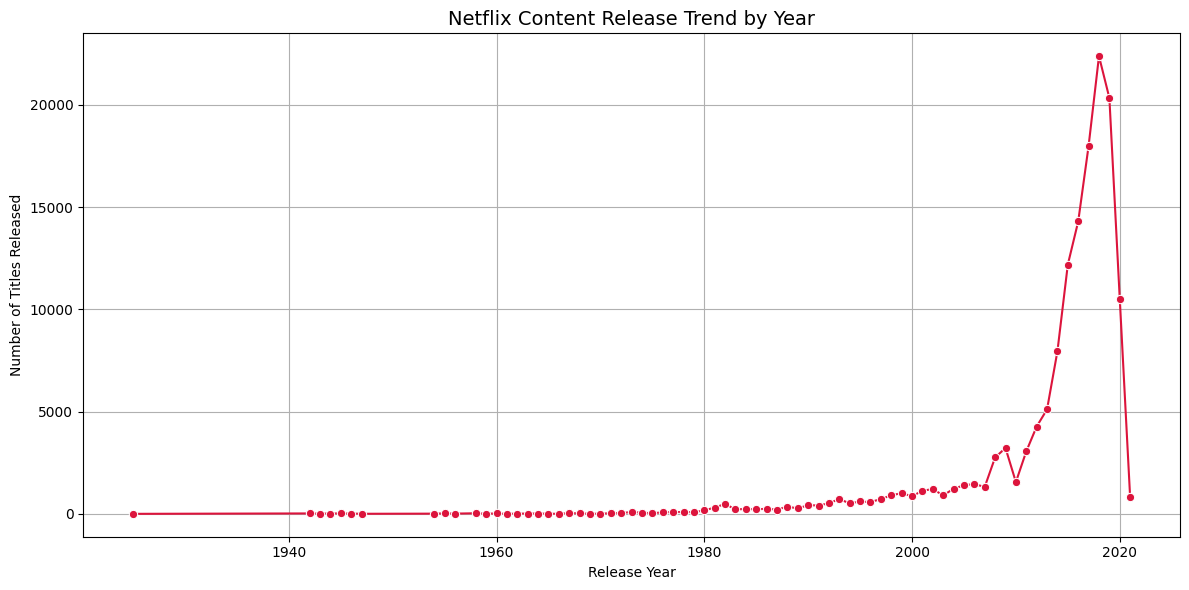

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by release year and count titles
release_trend = df['release_year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o', color='crimson')
plt.title('Netflix Content Release Trend by Year', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2) Rating distribution

C:\Users\Divya Ramaingam\AppData\Local\Temp\ipykernel_9444\1872074465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="magma")


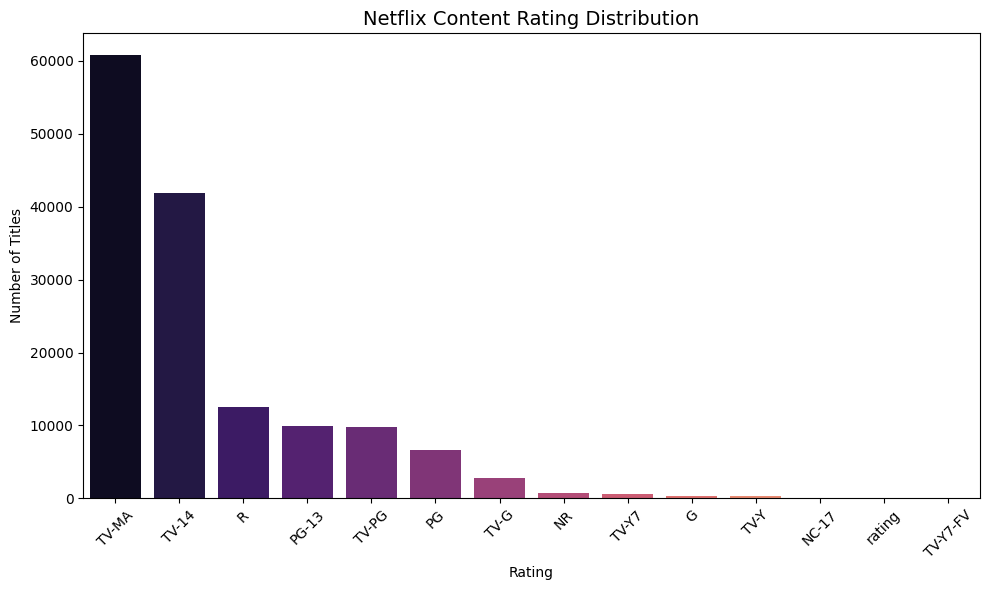

In [39]:
rating_counts =df['rating'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="magma")
plt.title('Netflix Content Rating Distribution', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3)Top Occuring Movie

In [40]:
top_movie = df['title'].value_counts().head(5)

# Display the result
print("Top Occurring Movie on Netflix:")
print(top_movie)

Top Occurring Movie on Netflix:
title
Anwar                              150
NOVA: Prediction by the Numbers    141
Kaabil                             123
Scare Tactics                      120
Bhouri                             120
Name: count, dtype: int64


#### 4)Top cast members

In [45]:
from collections import Counter

# Step 1: Drop null and clean
df_actor = df[['title', 'actor']].dropna().copy()
df_actor = df_actor[~df_actor['actor'].str.contains('Unknown', case=False)]

# Step 2: Split and explode actors
df_actor['actor'] = df_actor['actor'].str.split(', ')
df_actor = df_actor.explode('actor')
df_actor['actor'] = df_actor['actor'].str.strip()

# Step 3: Drop duplicate title-actor pairs
df_actor = df_actor.drop_duplicates(subset=['title', 'actor'])

# Step 4: Count appearances
top_5_unique_actors = df_actor['actor'].value_counts().head(5)

# Display result
print("🎬 Top 5 Actors by Unique Title Appearances:")
for actor, count in top_5_unique_actors.items():
    print(f"{actor}: {count} unique titles")


🎬 Top 5 Actors by Unique Title Appearances:
Anupam Kher: 43 unique titles
Shah Rukh Khan: 35 unique titles
Julie Tejwani: 33 unique titles
Takahiro Sakurai: 32 unique titles
Naseeruddin Shah: 32 unique titles


#### 5)Top Directors

In [42]:
from collections import Counter

# Drop nulls and exclude 'Unknown'
clean_directors = df['director'].dropna()
clean_directors = clean_directors[~clean_directors.str.contains('Unknown', case=False)]

# Split and flatten
directors_split = clean_directors.str.split(', ')
flat_directors = [director for sublist in directors_split for director in sublist]

# Count top 5
top_5_directors = Counter(flat_directors).most_common(5)

# Display result
print("Top 5 Directors in Netflix Dataset:")
for director, count in top_5_directors:
    print(f"{director}: {count} titles")
    

Top 5 Directors in Netflix Dataset:
Martin Scorsese: 427 titles
Jan Suter: 383 titles
Jay Chapman: 336 titles
Raúl Campos: 332 titles
Jay Karas: 297 titles


#### 6)Genre Popularity

In [43]:
from collections import Counter

# Drop missing values and split genres
genres = df['genre'].dropna().str.split(', ')
flat_genres = [genre.strip() for sublist in genres for genre in sublist]

# Count and get top 10 genres
genre_count = Counter(flat_genres).most_common(10)

# Display result
print("Top 10 Genres:")
for genre, count in genre_count:
    print(f"{genre}: {count} titles")


Top 10 Genres:
International Movies: 21765 titles
Dramas: 19169 titles
Comedies: 13641 titles
International TV Shows: 10628 titles
Documentaries: 7353 titles
Action & Adventure: 7193 titles
Independent Movies: 6227 titles
TV Dramas: 4948 titles
Children & Family Movies: 4884 titles
Romantic Movies: 4827 titles


In [44]:
df.to_csv("cleaned_netflix_data.csv", index=False)

In [46]:
df['title']

0       Dick Johnson Is Dead
0       Dick Johnson Is Dead
0       Dick Johnson Is Dead
0       Dick Johnson Is Dead
0       Dick Johnson Is Dead
                ...         
8806    Searching For Sheela
8806    Searching For Sheela
8806    Searching For Sheela
8806    Searching For Sheela
8806    Searching For Sheela
Name: title, Length: 146226, dtype: object